## Introdução


---


A pandemia do Coronavírus vem deixando marcas de tragédias em muitas famílias, empresas e países. Isso não diferiria no mercado financeiro, onde a expectativa influencia as tomadas de decisão. Mudanças políticas, catástrofes mundiais, pandemias podem mudar as expectativas dos investidores sobre o futuro de alguns ativos financeiros, bolsas e empresas.

O Brasil viveu momentos perigosos nessa pandemia. Fomos um dos países com maior número de casos a cada 1 milhão de habitantes, o segundo com o maior número de mortes. O mercado brasileiro viu o retorno sobre o patrimônio — um dos indicadores usados para medir o desempenho de uma empresa — cair ao longo dos meses durante essa pandemia.

O objetivo desse projeto é analisar o comportamento de alguns ativos. A análise será pelo preço e pelo retorno (que é interpretado a partir da volatilidade). Para isso, foram selecionados 5 ativos financeiros de diferentes setores (BANCO DO BRASIL, PETROBRÁS, GOL, MAGAZINE LUIZA e COGNA EDUCAÇÃO).

Aqui abrangemos banco, petróleo e gás, companhia aérea, varejo e educação.

**Sobre as instituições que serão analisadas no mercado: (informações retiradas da Wikipédia)**

**Banco do Brasil S.A**: é uma instituição financeira brasileira, constituída na forma de sociedade de economia mista, com participação do Governo Federal do Brasil em 50% das ações.

**Petrobrás S.A**: é uma empresa de capital aberto, cujo acionista majoritário é o Governo do Brasil, sendo, portanto, uma empresa estatal de economia mista
Gol Linhas Aéreas Inteligentes: é uma companhia aérea brasileira sediada no Rio de Janeiro, fundada em 2001.

**Magazine Luiza**: é uma rede varejista de eletrônicos e móveis brasileira, fundada em 1957 na cidade de Franca pelo casal Pelegrino José Donato e sua esposa Luiza Trajano Donato.

**Cogna Educação**: é a nona maior empresa relacionada a educação do mundo. Foi fundada em 1966 em Belo Horizonte a partir da criação de uma empresa de cursos pré-vestibular chamada Pitágoras.

**Metodologia**

Será utilizado técnicas de análise exploratória de dados para analisar os dados financeiros, como estatística descritiva e visualizações. Será uma investigação sobre o comportamento do mercado financeiro, então exploraremos alguns conceitos relacionado a esse tema.

A análise está dividida da seguinte maneira:

A primeira parte está reservada à análise dos preços ao longo do ano de 2020, exploraremos métricas simples como média, desvio padrão e correlação.

A segunda parte é dedicada a estudar a volatilidade (retorno) dos ativos financeiros. E utilizando as mesmas métricas da primeira parte do projeto, conseguiremos comparar as informações dos preços e da volatilidade.

A terceira parte é onde analisaremos o IBOVESPA, seus preços e volatilidade, e comparando com os ativos antes estudados. Verificaremos as correlações utilizando a descrição e a visualização.

Por último, vamos concluir essa análise fazendo um apanhado geral dos dados obtidos e exibindo gráficos úteis para complementar tudo que foi estudado ao longo do texto.

**Dados**

Os dados foram obtidos a partir da biblioteca yfinance, selecionando o *yahoo finance* como fonte.

In [ ]:
# !pip install mplfinance

In [44]:
import pandas as pd
import math
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import mplfinance as mpf
import requests
import yfinance as yf
sns.set_style('white')
sns.despine(top=True, right=True)

import warnings

# Desativar todos os warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option ('display.float_format', lambda x: '%.2f' % x)

<Figure size 640x480 with 0 Axes>

In [8]:
inicio = datetime.datetime(2020, 1, 1)
fim = datetime.datetime(2020, 12, 1)
tickers = ['BANCO DO BRASIL', 'PETROBRÁS', 'GOL', 'JBS', 'MAGAZINE LUIZA', 'COGNA EDUCAÇÃO']

BANCO_DO_BRASIL = yf.download('BBAS3.SA', inicio, fim)
PETROBRAS = yf.download('PETR4.SA', inicio, fim)
GOL = yf.download('GOLL4.SA', inicio, fim)
JBS = yf.download('JBSS3.SA', inicio, fim)
MAGAZINE_LUIZA = yf.download('MGLU3.SA', inicio, fim)
COGNA_EDUCAÇÃO = yf.download('COGN3.SA', inicio, fim)

ativos = pd.concat([BANCO_DO_BRASIL, PETROBRAS, GOL, JBS, MAGAZINE_LUIZA, COGNA_EDUCAÇÃO], axis=1, keys=tickers)
ativos.columns.names = ['nome_ativo','acontecimento']
ativos.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


nome_ativo    BANCO DO BRASIL                                              \
acontecimento            Open       High        Low      Close  Adj Close   
Date                                                                        
2020-01-02          53.349998  53.970001  53.169998  53.799999  41.380932   
2020-01-03          53.099998  53.910000  52.849998  53.709999  41.311710   
2020-01-06          53.400002  53.400002  52.450001  53.000000  40.765602   
2020-01-07          53.000000  53.029999  52.290001  52.599998  40.457951   
2020-01-08          52.759998  52.990002  52.040001  52.119999  40.088737   

nome_ativo               PETROBRÁS                                   ...  \
acontecimento    Volume       Open       High        Low      Close  ...   
Date                                                                 ...   
2020-01-02     13159900  30.510000  30.700001  30.309999  30.700001  ...   
2020-01-03      9465400  30.879999  31.240000  30.450001  30.450001  ...   
2020-01-06      9999900  30.430000  30.940001  29.950001  30.809999  ...   
2020-01-07     10638500  30.820000  30.879999  30.469999  30.690001  ...   
2020-01-08     21468600  30.690001  30.770000  30.240000  30.500000  ...   

nome_ativo    MAGAZINE LUIZA                               COGNA EDUCAÇÃO  \
acontecimento            Low    Close  Adj Close    Volume           Open   
Date                                                                        
2020-01-02           11.9275  12.3325  12.029735  29600800          11.55   
2020-01-03           12.0750  12.2225  11.922435  26737600          11.87   
2020-01-06           11.9500  12.2325  11.932189  27359200          12.00   
2020-01-07           12.1250  12.1975  11.898048  26818800          11.99   
2020-01-08           12.1250  12.5725  12.263842  40007200          12.18   

nome_ativo                                              
acontecimento   High    Low  Close Adj Close    Volume  
Date                                                    
2020-01-02     12.20  11.46  12.20     12.20  12730400  
2020-01-03     12.37  11.82  12.15     12.15  12593300  
2020-01-06     12.07  11.70  11.99     11.99   8944500  
2020-01-07     12.21  11.75  12.08     12.08   7579200  
2020-01-08     12.27  11.90  12.00     12.00   7866300  

[5 rows x 36 columns]

In [9]:
ativos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 228 entries, 2020-01-02 to 2020-11-30
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   (BANCO DO BRASIL, Open)       228 non-null    float64
 1   (BANCO DO BRASIL, High)       228 non-null    float64
 2   (BANCO DO BRASIL, Low)        228 non-null    float64
 3   (BANCO DO BRASIL, Close)      228 non-null    float64
 4   (BANCO DO BRASIL, Adj Close)  228 non-null    float64
 5   (BANCO DO BRASIL, Volume)     228 non-null    int64  
 6   (PETROBRÁS, Open)             228 non-null    float64
 7   (PETROBRÁS, High)             228 non-null    float64
 8   (PETROBRÁS, Low)              228 non-null    float64
 9   (PETROBRÁS, Close)            228 non-null    float64
 10  (PETROBRÁS, Adj Close)        228 non-null    float64
 11  (PETROBRÁS, Volume)           228 non-null    int64  
 12  (GOL, Open)                   228 non-null   

Não foi necessário o pré-processamento dos dados uma vez que foram extraidos de uma API e não há nenhuma incoformidade com os mesmos

## EDA

### Análise dos preços de cada ativo financeiro


---


Os preços numa economia de mercado estão sempre num movimento de sobe e desce, obedecendo a lei da oferta e demanda. No mercado financeiro isso não é diferente, o preço dos ativos estão sempre subindo e descendo, obedecendo a lei fundamental do mercado.

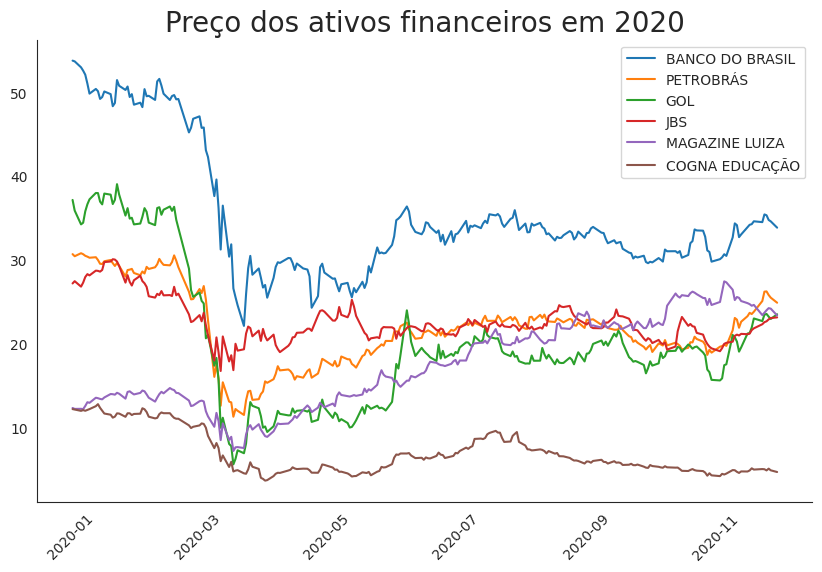

In [20]:
# Plotando gráfico dos ativos financeiros ao longo do ano de 2020
plt.figure(figsize=(10, 6))
for i in tickers:
    plt.plot(ativos[i]['Close'], label=i)

plt.title('Preço dos ativos financeiros em 2020', fontsize=20)
plt.xlabel('')
plt.xticks(rotation=45)
plt.legend()

sns.despine(top=True, right=True)

plt.show()

Por volta de março, ocorreu uma queda significativa nos preços dos ativos. Esse período coincidiu com o início dos isolamentos sociais, o fechamento de comércios e as crescentes preocupações com os números de mortes relacionadas à pandemia. Esse contexto gerou incertezas consideráveis sobre o futuro da economia, tanto no Brasil quanto no mundo todo. Como resultado, o mercado financeiro começou a apresentar um declínio acentuado, refletindo as expectativas pessimistas dos investidores em relação aos desdobramentos da crise sanitária.

### Estatísticas descritivas dos fechamentos

In [95]:
# Estatística descritivas dos fechamentos
fechamentos = ativos.xs(key="Close", axis=1, level="acontecimento")

df_resumo = fechamentos.describe().T

df_resumo['Diferença'] = df_resumo['max'] - df_resumo['min']
df_resumo['Queda %'] = ((df_resumo['max'] - df_resumo['min']) / df_resumo['max']) * 100

df_resumo.rename(columns={'min': 'Fech. Mínimo', 'max': 'Fech. Máximo', 'mean': 'Média', 'std': 'DP'}, inplace=True)

df_resumo['Data Mín'] = fechamentos.idxmin()
df_resumo['Data Máximo'] = fechamentos.idxmax()


df_resumo

,count,Média,DP,Fech. Mínimo,25%,50%,75%,Fech. Máximo,Diferença,Queda %,Data Mín,Data Máximo
nome_ativo,,,,,,,,,,,,
BANCO DO BRASIL,228.00,35.17,7.61,22.13,30.38,33.23,35.23,53.80,31.67,58.87,2020-03-23,2020-01-02
PETROBRÁS,228.00,21.85,4.52,11.29,19.32,21.72,23.30,30.81,19.52,63.36,2020-03-18,2020-01-06
GOL,228.00,20.13,8.12,5.60,15.64,18.81,21.21,39.05,33.45,85.66,2020-03-18,2020-01-23
JBS,228.00,22.67,2.57,16.75,21.13,22.06,23.36,30.09,13.34,44.33,2020-03-12,2020-01-21
MAGAZINE LUIZA,228.00,17.51,5.24,7.20,13.44,17.09,22.14,27.45,20.25,73.76,2020-03-18,2020-11-05
COGNA EDUCAÇÃO,228.00,6.97,2.55,3.66,4.98,6.00,8.62,12.79,9.13,71.38,2020-04-02,2020-01-14


### Volatilidade

---

A volatilidade é uma variável que representa a frequência e intensidade oscilações no preço de um ativo num determinado período de tempo. Quanto maior a volatilidade, maior a variação do preço do ativo ativo.
Mas a volatilidade vai além disso. Ela mostra se relaciona também com o próprio mercado. Os índices do mercado financeiro podem ser influenciados por uma série de fatores externos, como o cenário político, o otimismo e pessimismo dos investidores, ou uma **pandemia**.

In [63]:
volatilidade = pd.DataFrame()
for tick in tickers:
  volatilidade[tick + '(volatilidade)'] = ativos[tick]['Close'].pct_change()
volatilidade.head()

,BANCO DO BRASIL(volatilidade),PETROBRÁS(volatilidade),GOL(volatilidade),JBS(volatilidade),MAGAZINE LUIZA(volatilidade),COGNA EDUCAÇÃO(volatilidade)
Date,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.00,-0.01,-0.03,0.01,-0.01,-0.00
2020-01-06,-0.01,0.01,-0.05,-0.02,0.00,-0.01
2020-01-07,-0.01,-0.00,0.01,0.02,-0.00,0.01
2020-01-08,-0.01,-0.01,0.04,0.02,0.03,-0.01


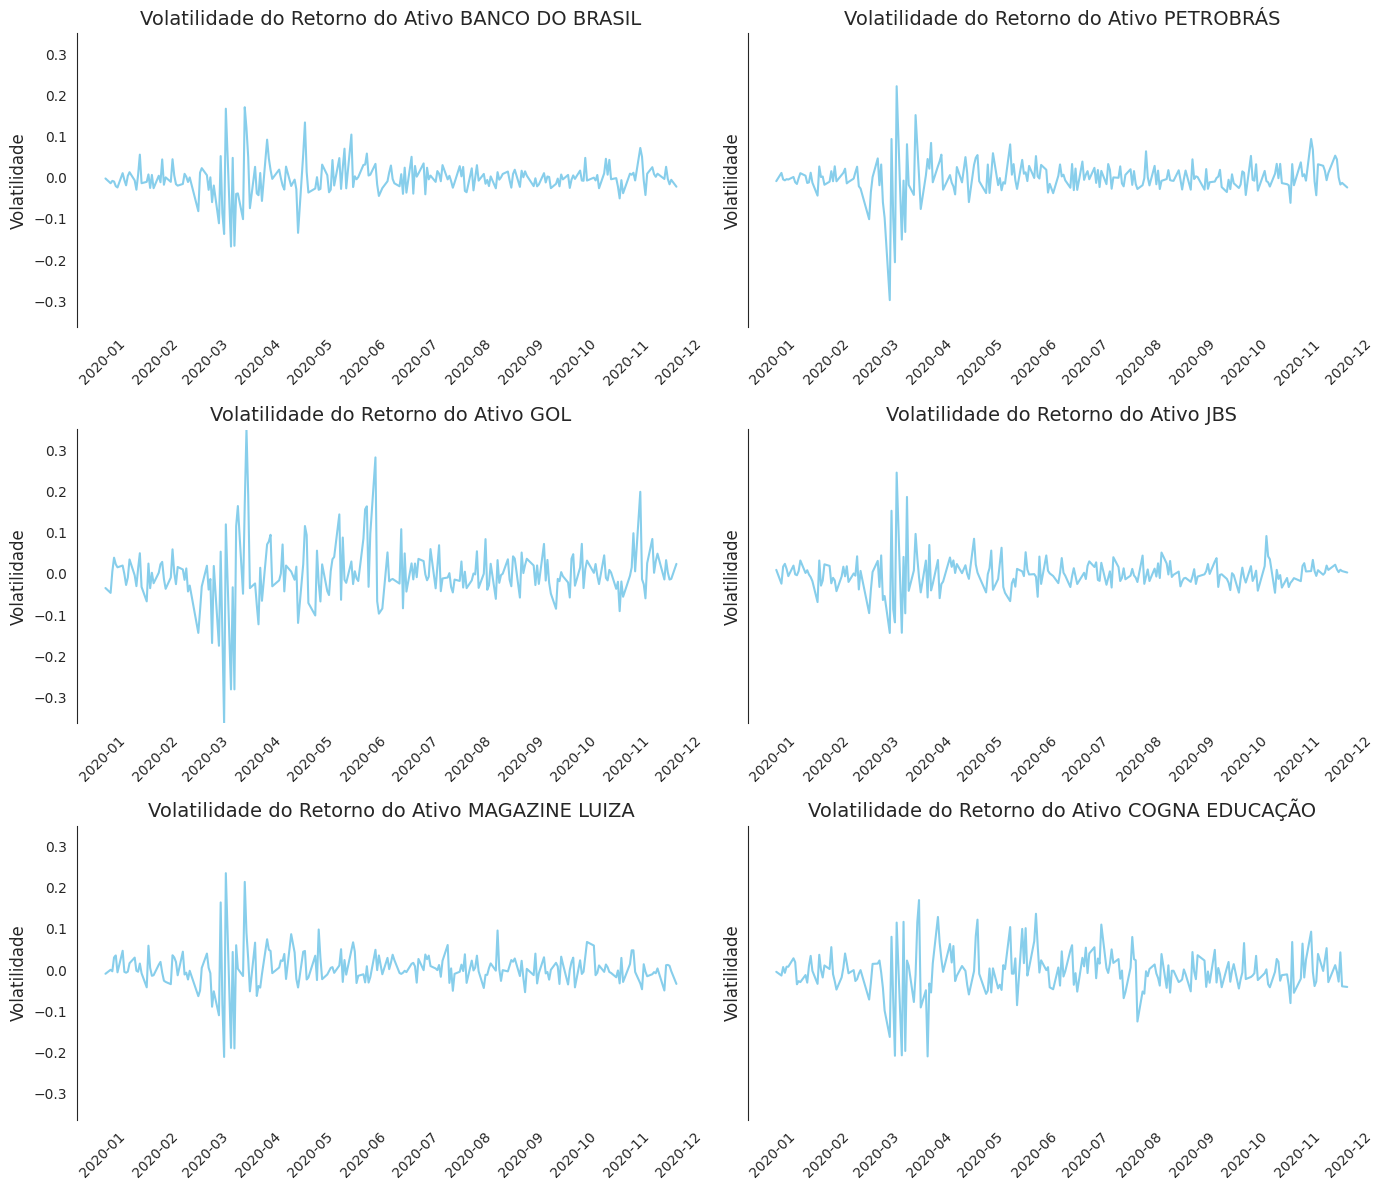

In [75]:
# Exibindo gráfico com a volatilidade dos ativos
num_linhas = (len(volatilidade.columns) + 1) // 2
num_colunas = 2
max_y = volatilidade.max().max()
min_y = volatilidade.min().min()

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(14, 4*num_linhas))

for i, coluna in enumerate(volatilidade.columns):
    linha = i // num_colunas
    col = i % num_colunas

    sns.lineplot(data=volatilidade[coluna], ax=axs[linha, col], color='skyblue')
    axs[linha, col].set_title(f'Volatilidade do Retorno do Ativo {str(coluna).strip("(volatilidade)")}', fontsize=14)
    axs[linha, col].set_xlabel('')
    axs[linha, col].set_ylabel('Volatilidade', fontsize=12)

    sns.despine(ax=axs[linha, col], bottom=True)
    axs[linha, col].tick_params(axis='x', labelrotation=45)
    axs[linha, col].set_ylim(min_y, max_y)

    if col == 0:
        axs[linha, col].tick_params(axis='y', labelleft=True)
    else:
        axs[linha, col].tick_params(axis='y', labelleft=False)

plt.tight_layout()
plt.show()

Como podemos observar, entre março e maio, as variações do preço do ativo foram muito mais intensas, e isso é representado pelas oscilações nos gráficos.
O que explica essa oscilação nessa intensidade?
A explicação mais plausível é que esse foi o período onde começaram os isolamentos sociais, e as quarentenas. Seguido do fechamento de comércios e muitos postos de trabalho

Descobrir o que aconteceu no dia da alta e baixa dos ativos

In [73]:
# Encontrando os dias de baixa e alta volatilidade
baixa = volatilidade.idxmin()
alta = volatilidade.idxmax()

df_volatilidade = pd.DataFrame({
    "Baixa Volatilidade": baixa,
    "Alta Volatilidade": alta
})

df_volatilidade.head()

,Baixa Volatilidade,Alta Volatilidade
BANCO DO BRASIL(volatilidade),2020-03-16,2020-03-24
PETROBRÁS(volatilidade),2020-03-09,2020-03-13
GOL(volatilidade),2020-03-12,2020-03-25
JBS(volatilidade),2020-03-09,2020-03-13
MAGAZINE LUIZA(volatilidade),2020-03-12,2020-03-13


Observa-se que o dia com menor volatilidade for 16/03 e o dia com maior volatilidade foi 13/03. A data coincide com periodo onde começamos a apertar o isolamento social, por volta do meado de março. O leitor ainda pode pesquisar no Google sobre notícias que aconteceram nesse dia.

### Médias móveis

---
A média móvel é uma métrica importante para analisar as mudanças no mercado. Com ela podemos ver a **tendência dos preços** dos ativos, facilitando a observação do comportamento durante todo o período de tempo. Ela nos dá uma suavização, o que torna muito mais atraente aos nosso olhos, simplificando a visualização e a informação.





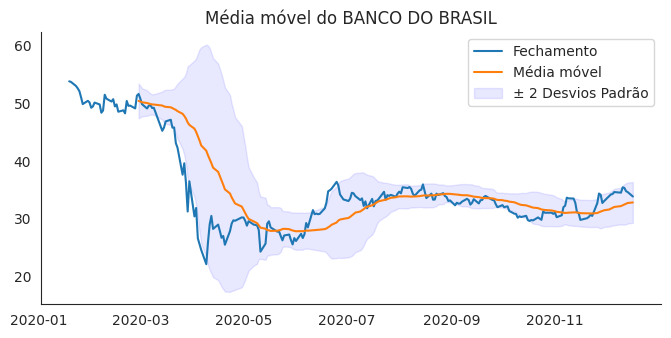

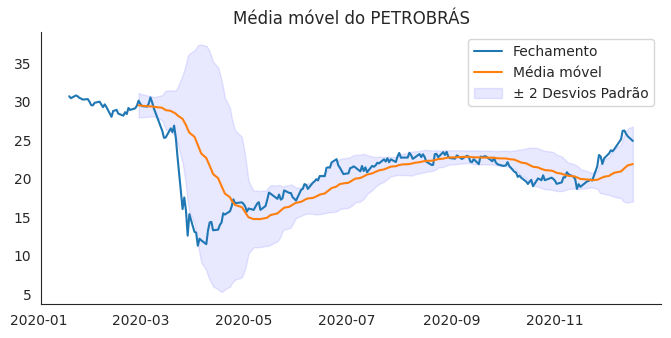

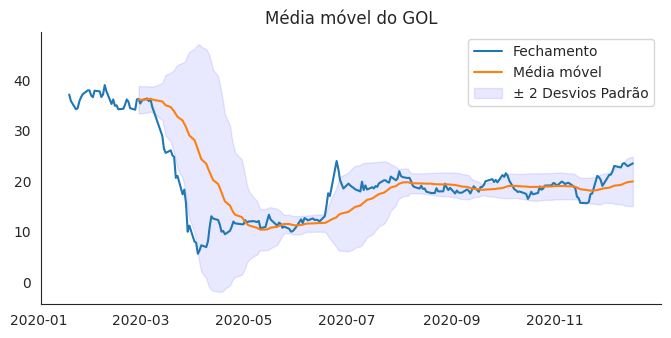

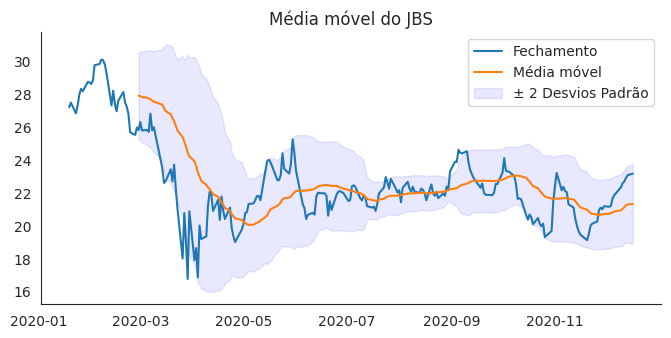

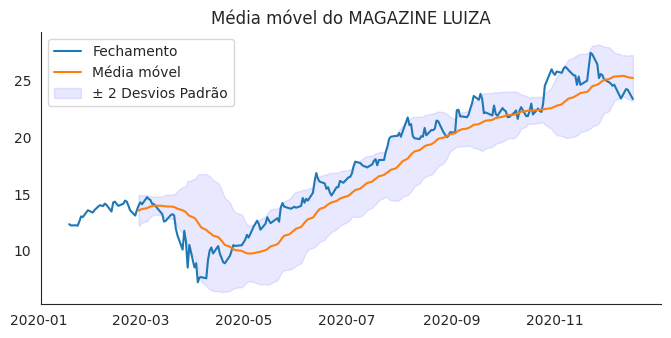

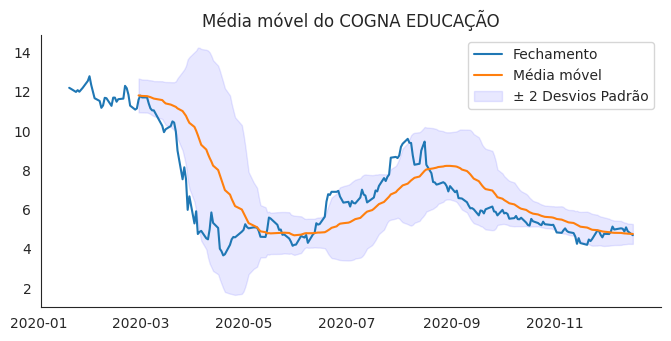

In [119]:
# Exibindo gráfico dos fechamentos com as médias moveis dos ativos + faixa de desvio padrão
for i in ativos.columns.levels[0]:
  ativos_2020_close = ativos[f'{i}']['Close'][ativos[f'{i}'].index.year == 2020]
  ativos_2020_open = ativos[f'{i}']['Open'][ativos[f'{i}'].index.year == 2020]
  ativos_2020_high = ativos[f'{i}']['High'][ativos[f'{i}'].index.year == 2020]
  ativos_2020_low = ativos[f'{i}']['Low'][ativos[f'{i}'].index.year == 2020]
  ativos_2020_volume = ativos[f'{i}']['Volume'][ativos[f'{i}'].index.year == 2020]

  media = ativos_2020_close.rolling(30).mean()
  std = ativos_2020_close.rolling(30).std()

  plt.figure(figsize=(8,4))
  ativos_2020_close.plot(label='Fechamento')
  media.plot(label='Média móvel')
  plt.fill_between(ativos_2020_close.index, media - 2 * std, media + 2 * std, color='b', alpha=0.09, label='± 2 Desvios Padrão') # Dois desvios padroes da média
  plt.legend()
  sns.despine()
  plt.xlabel('')
  plt.xticks(rotation=360)
  plt.title(f'Média móvel do {f"{i}"}')

As oscilações maiores (em laranja) nos mostram os ciclos que se passaram no mercado durante esse ano, sendo no período de março a maior queda. De fato, a doença, o isolamento social (que foi necessário para conter o avanço da pandemia), as incertezas sobre o ano, as notícias sobre mortes e casos avançando cada vez mais, e todo o caos influenciaram as expectativas no mercado financeiro.
Podemos observar aqui, que a Magazine Luiza conseguiu decolar em meio a uma crise mundial.

### Correlação entre a volatilidade

In [97]:
res = volatilidade.corr()

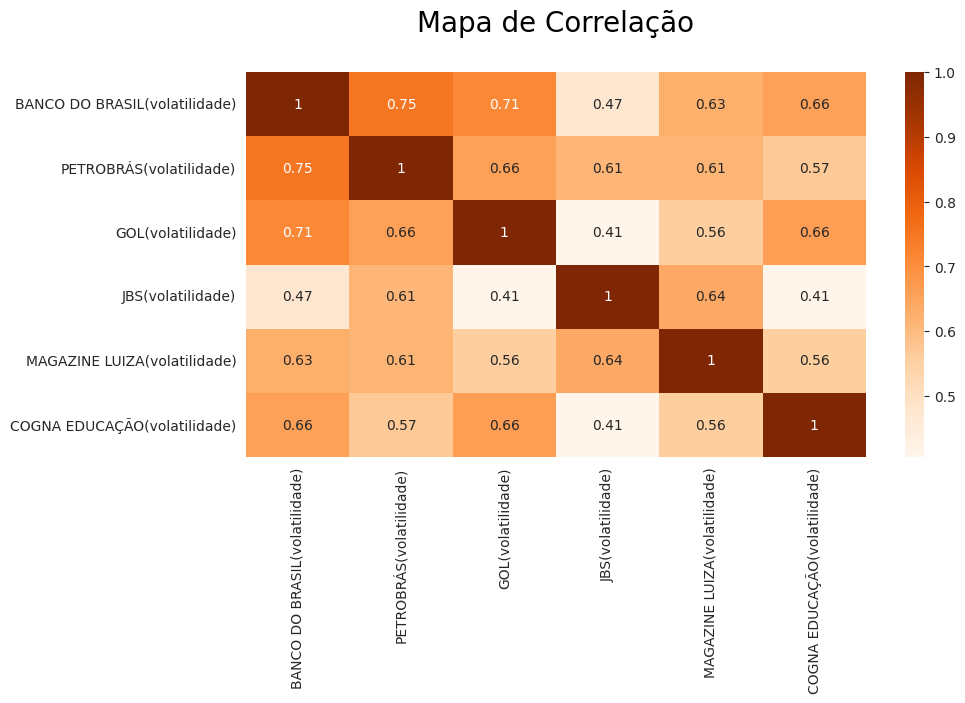

In [101]:
# Mapa de Correlação entre a volatilidade dos ativos
plt.figure(figsize = (10,5))
sns.heatmap(res, annot = True, cmap = "Oranges")
plt.title("Mapa de Correlação\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})
plt.show()


Com um gráfico de dispersão podemos observar as mesmas informações de maneira diferente, nos dando mais uma percepção sobre a mesma informação.

Uma maneira simples e eficiente de fazer isso é usando o pairplot do seaborn.

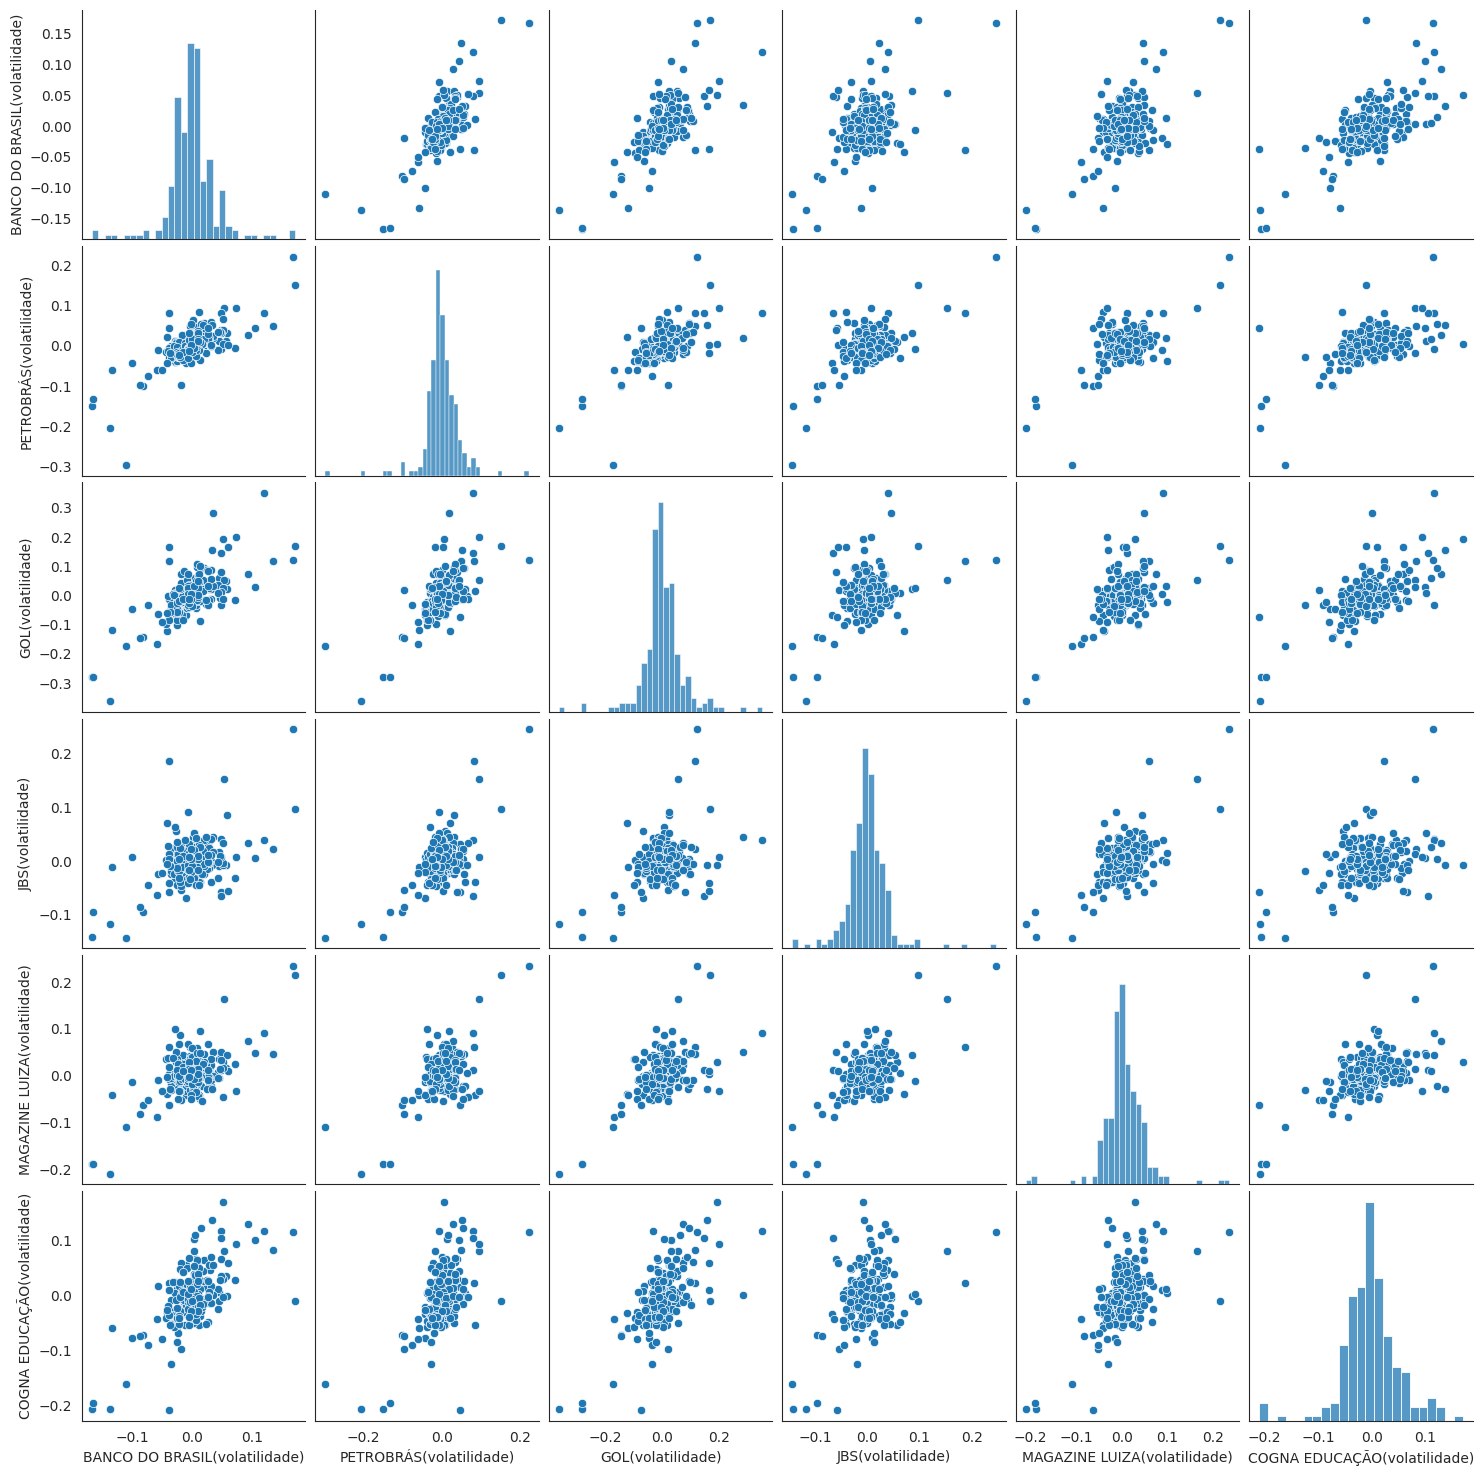

In [99]:
sns.pairplot(volatilidade)

## Correlações

---
O quão correlacionadas estão essas volatilidades? Elas se acompanham? Positivamente ou negativamente?

Os ativos no mercado costumam se comportar de maneira similar em casos de crise ou de boom. Isso porque a economia vai perdendo ou ganhando como um todo, o que por sua vez reflete o resultado no mercado financeiro.

**Um guia para interpretar correlações:**

Utilizaremos a [correlação de Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson) nessa análise, ela se encaixa melhor com o objetivo do projeto.
* 1.0 positivo ou negativo indica uma correlação perfeita
* 0.9 positivo ou negativo indica uma correlação muito forte.
* 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
* 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
* 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
* 0.1 a 0.3 positivo ou negativo indica uma correlação desprezível.
* 0 indica uma correlação inexistente


### Correlação entre os preços

In [102]:
preço_ativos = pd.DataFrame()
for i in tickers:
  preço_ativos[i + '(preço)'] = ativos[i]['Close']
res2 = preço_ativos.corr()

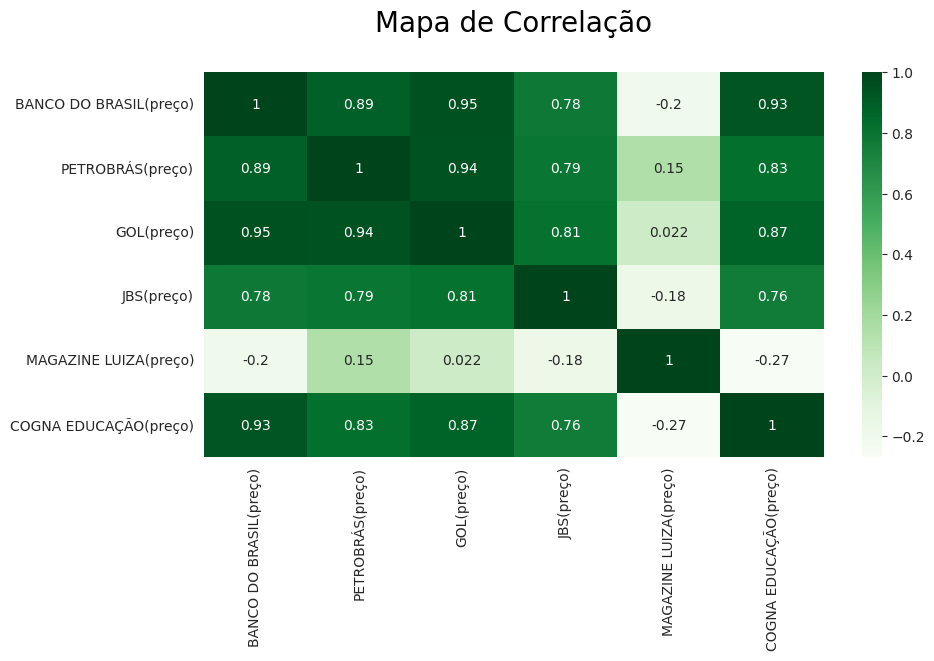

In [107]:
# Mapa de Correlação entre o valor dos ativos
plt.figure(figsize = (10,5))
sns.heatmap(res2, annot = True, cmap = "Greens")
plt.title("Mapa de Correlação\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})
plt.show()


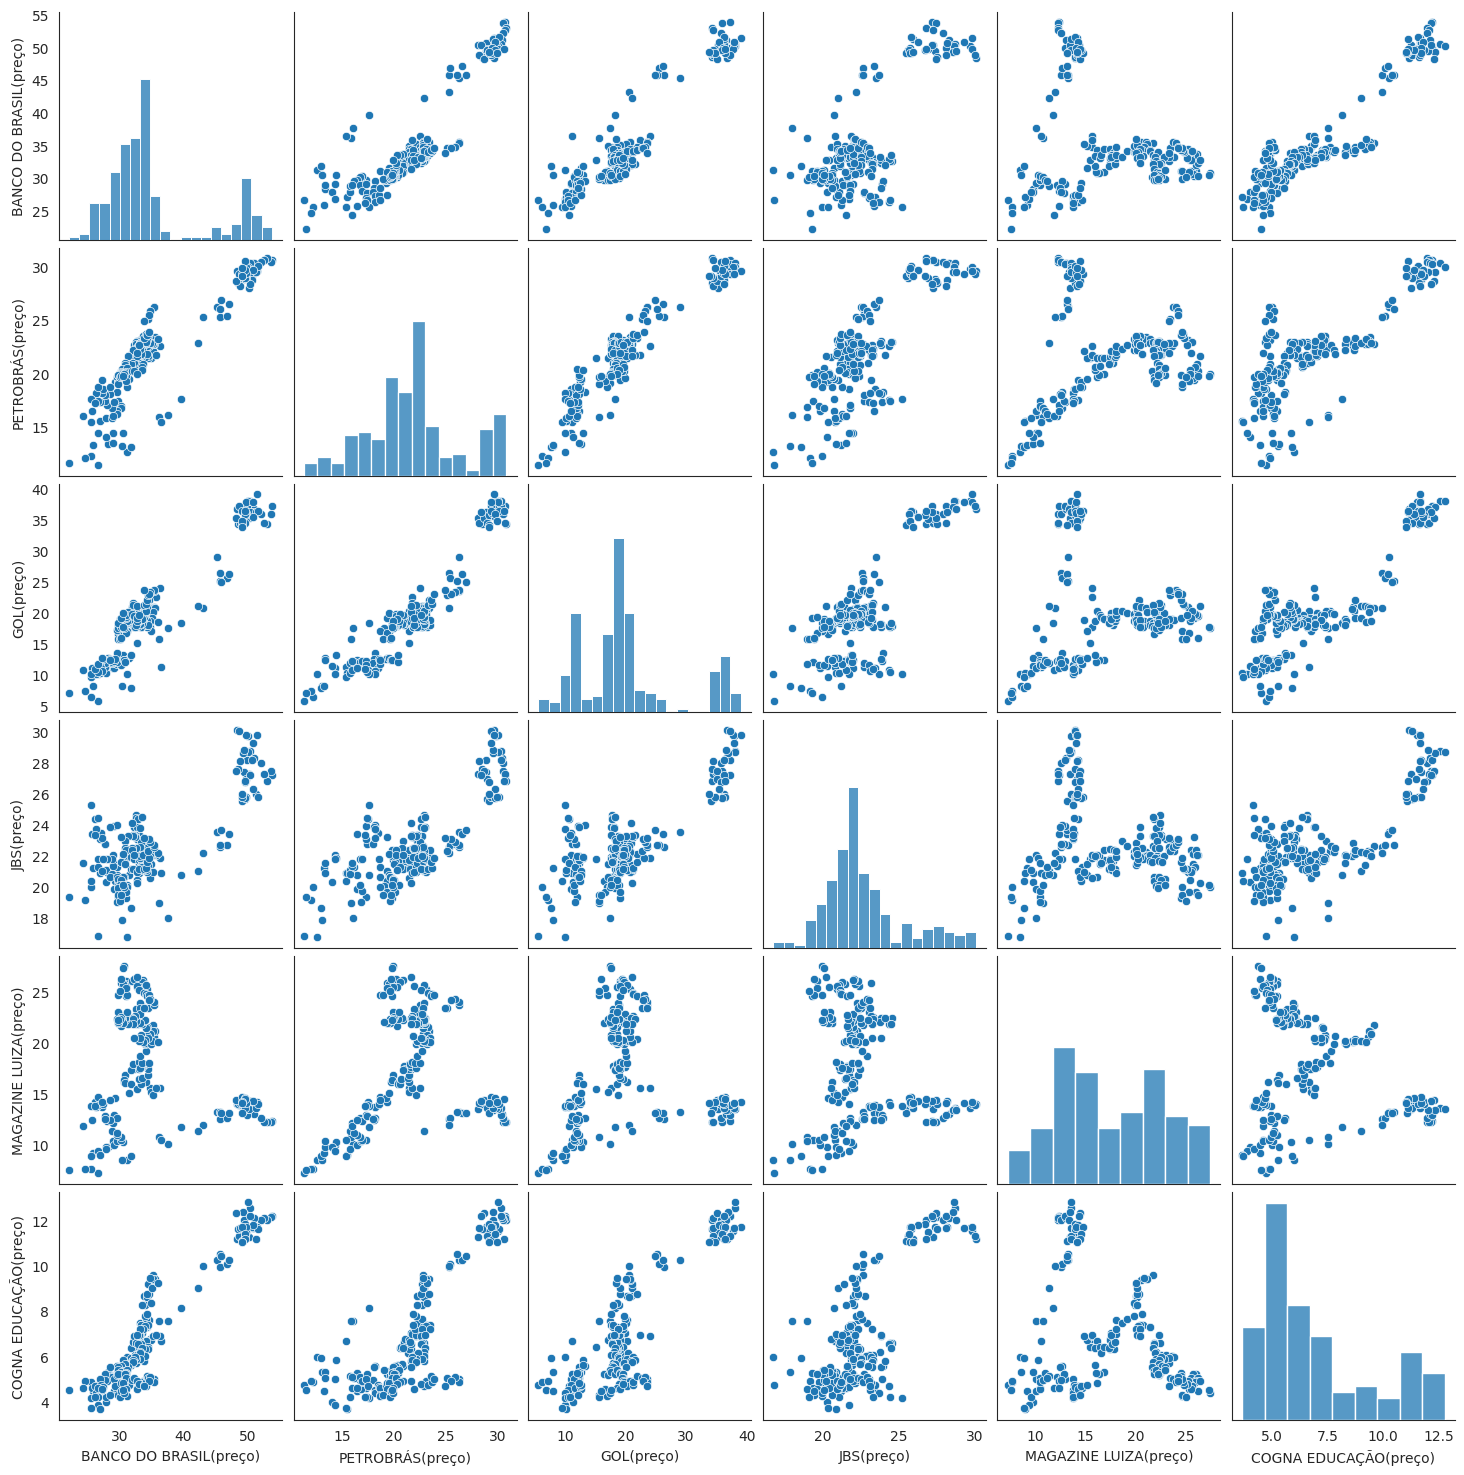

In [106]:
sns.pairplot(preço_ativos)

Dentre as correlações apontadas, nota-se que a menor delas é o ativo da Magazine Luiza, que por vezes conseguiu até ficar negativa (indicando que se correlacionava de modo contrario, nesse contexto as quedas das ações), fato também notado na média movel do fechamento das ações. Como conseguiu esse feito em plena crise mundial?

Algumas notícias indicam que houve um boom no varejo digital - ou compras online - que pode ter sido impulsionada pelo isolamento social que se teve durante o periodo.

Fontes -

https://www.meioemensagem.com.br/marketing/pandemia-impulsiona-transformacao-digital-no-varejo

VIEIRA, Carolina; BOREL, Jonathan Pio. O impacto econômico-financeiro da pandemia do COVID-19 na rede varejista Magazine Luiza SA. Anais da Noite Acadêmica do Centro Universitário UNIFACIG, v. 1, 2021.

PINHEIRO, Aurilene Figueiredo; MACÊDO, Maria Erilucia Cruz. Marketing Digital: Estratégias de Vendas com o Varejo Digital na Pandemia do COVID-19/Digital Marketing: Sales Strategies with Digital Retail during COVID-19 Pandemic. ID on line. Revista de psicologia, v. 15, n. 55, p. 194-205, 2021.


## Análise do IBOVESPA

In [110]:
IBOVESPA = yf.download('^BVSP', inicio, fim)
IBOVESPA.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,115652.00,118573.00,115649.00,118573.00,118573.00,5162700
2020-01-03,118564.00,118792.00,117341.00,117707.00,117707.00,6834500
2020-01-06,117707.00,117707.00,116269.00,116878.00,116878.00,6570000
2020-01-07,116872.00,117076.00,115965.00,116662.00,116662.00,4854100
2020-01-08,116667.00,117335.00,115693.00,116247.00,116247.00,5910500


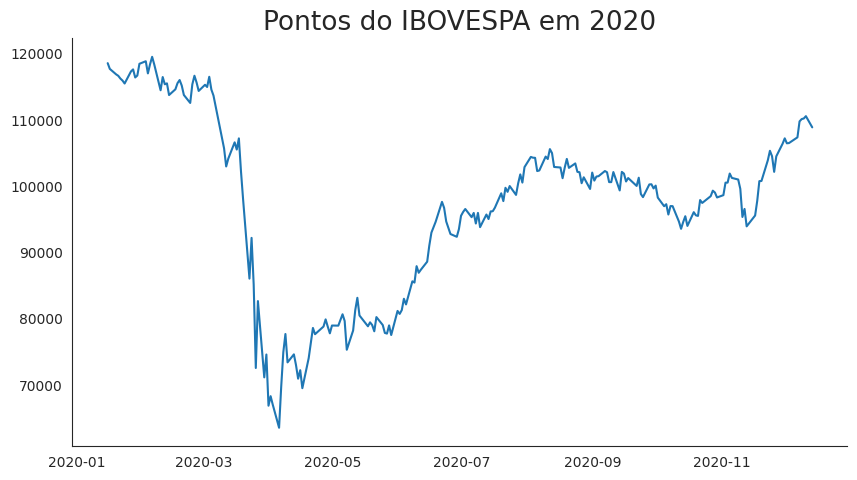

In [112]:
IBOVESPA['Close'].plot(figsize=(10,6))
plt.xticks(rotation=360)
sns.despine()
plt.title('Pontos do IBOVESPA em 2020',fontsize=19)
plt.xlabel('');

Uma queda acentuada é notada no mesmo período de queda dos ativos financeiros que analisamos anteriormente

- Volatilidade do IBOVESPA

Text(0.5, 0, '')

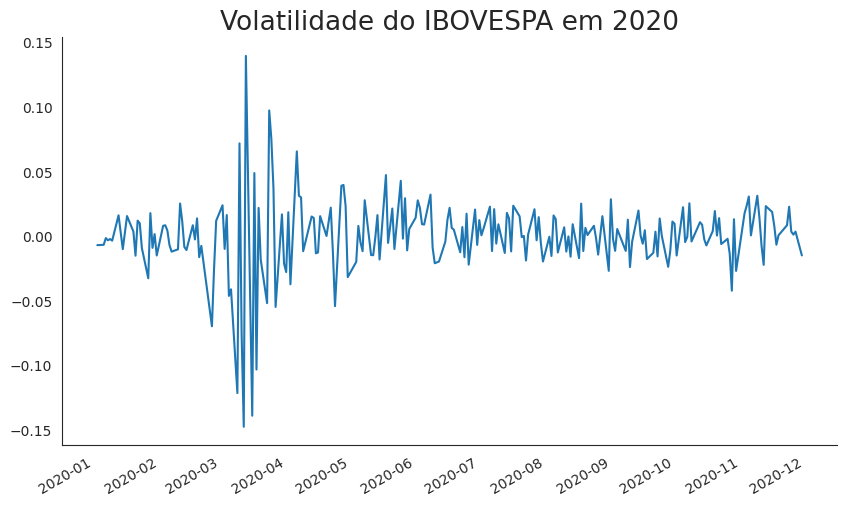

In [115]:
IBOVESPA_volat = IBOVESPA['Close'].pct_change()
IBOVESPA_volat.plot(figsize=(10,6))
sns.despine()
plt.title('Volatilidade do IBOVESPA em 2020',fontsize=19)
plt.xlabel('')

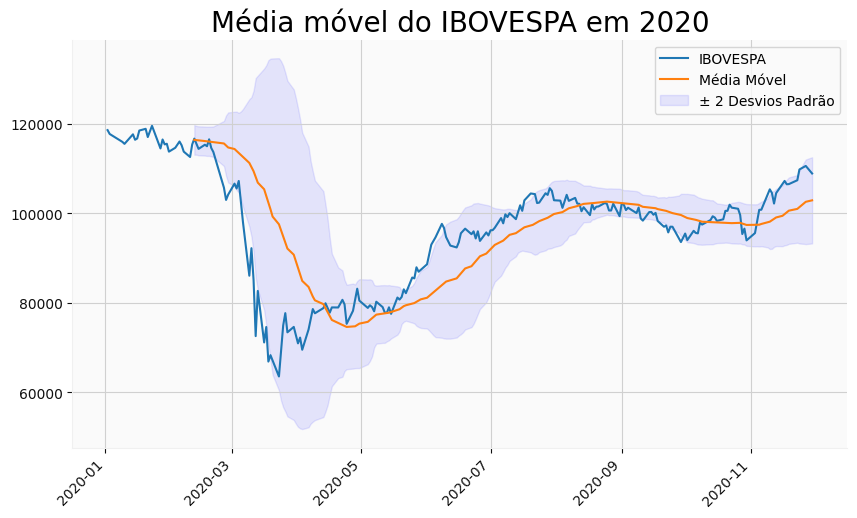

In [138]:
# Exibindo gráfico dos fechamentos com as médias moveis dos ativos + faixa de desvio padrão
media_movel = IBOVESPA['Close'].rolling(30).mean()
desvio_padrao = IBOVESPA['Close'].rolling(30).std()

plt.figure(figsize=(10, 6))
IBOVESPA['Close'].plot(label='IBOVESPA')
media_movel.plot(label='Média Móvel')
plt.fill_between(media_movel.index, media_movel - 2 * desvio_padrao, media_movel + 2 * desvio_padrao, color='b', alpha=0.09, label='± 2 Desvios Padrão')
plt.xticks(rotation=45)
plt.xlabel('')
plt.title('Média móvel do IBOVESPA em 2020', fontsize=20)
plt.legend()
sns.despine()
plt.show()

In [123]:
preço_corr = pd.DataFrame()
for i in tickers:
  preço_corr[i + 'corr'] = pd.Series(IBOVESPA['Close'].corr(ativos[i]['Close']))
preço_corr = preço_corr.dropna().T
preço_corr.columns = ['Correlação']
media = 0
for i in tickers:
  media += (IBOVESPA["Close"].corr(ativos[i]["Close"]))/len(tickers)
  desvio_padrao = preço_corr.std()
  print(f'Correlação do IBOVESPA COM {i}: {IBOVESPA["Close"].corr(ativos[i]["Close"]):.3f}')
print(f'\nCorrelação média: {media:.3f}\nDesvio padrão: {desvio_padrao}')

Correlação do IBOVESPA COM BANCO DO BRASIL: 0.812
Correlação do IBOVESPA COM PETROBRÁS: 0.948
Correlação do IBOVESPA COM GOL: 0.905
Correlação do IBOVESPA COM JBS: 0.671
Correlação do IBOVESPA COM MAGAZINE LUIZA: 0.386
Correlação do IBOVESPA COM COGNA EDUCAÇÃO: 0.738

Correlação média: 0.743
Desvio padrão: Correlação   0.20
dtype: float64


A maior correlação se encontra com a Petrobrás (**0.949**), e a média em **0.743**. Ou seja, o IBOVESPA está muito mais correlacionado com Petrobrás do que com os bancos brasileiros. Isso porque o petróleo é a a fonte de energia mais utilizada no mundo, então é normal que o mercado financeiro acompanhe seus movimentos de preços. Veremos, em breve, essa correlação para a volatilidade, ou seja, para as oscilações dos preços.
Obtivemos também um desvio padrão de **0.2** em relação a média. Verificaremos se é maior ou menor que a da volatilidade.


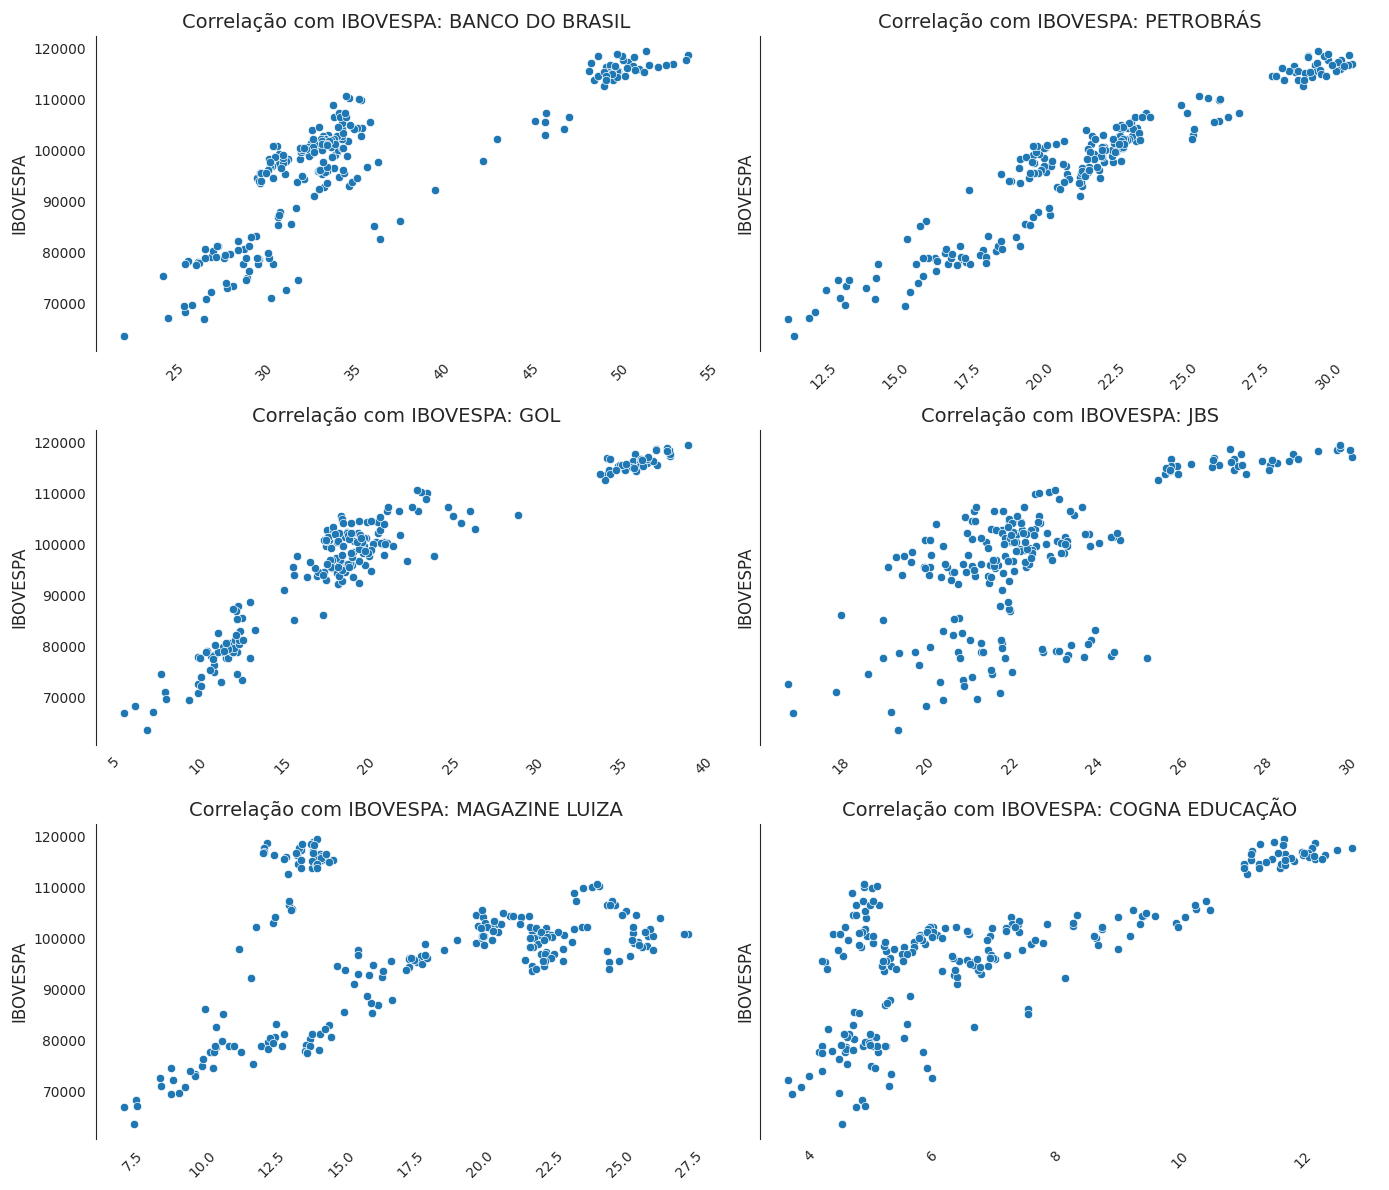

In [129]:
num_linhas = (len(tickers) + 1) // 2
num_colunas = 2

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(14, 4*num_linhas))

for i, ticker in enumerate(tickers):
    linha = i // num_colunas
    col = i % num_colunas

    sns.scatterplot(x=ativos[ticker]['Close'], y=IBOVESPA['Close'], ax=axs[linha, col])
    axs[linha, col].set_title(f'Correlação com IBOVESPA: {ticker}', fontsize=14)
    axs[linha, col].set_xlabel('')
    axs[linha, col].set_ylabel('IBOVESPA', fontsize=12)

    sns.despine(ax=axs[linha, col], bottom=True)
    axs[linha, col].tick_params(axis='x', labelrotation=45)

    if col == 0:
        axs[linha, col].tick_params(axis='y', labelleft=True)
    else:
        axs[linha, col].tick_params(axis='y', labelleft=False)

plt.tight_layout()
plt.show()

### Correlação da volatilidade

In [130]:
volatilidade_corr = pd.DataFrame()
for i in volatilidade.columns:
  volatilidade_corr[i + 'corr'] = pd.Series(IBOVESPA_volat.corr(volatilidade[i]))
volatilidade_corr = volatilidade_corr.dropna().T
volatilidade_corr.columns = ['Correlação']
media = 0
for i in volatilidade.columns:
  media += (IBOVESPA_volat.corr(volatilidade[i])) /len(volatilidade.columns)
  desvio_padrao = volatilidade_corr.std()
  print(f'Correlação entre IBOVESPA e {i.strip("(volatilidade)")}: {IBOVESPA_volat.corr(volatilidade[i]):.3f}')
print(f'\nCorrelação média: {media:.3f}\nDesvio padrão da {desvio_padrao}')

Correlação entre IBOVESPA e BANCO DO BRASIL: 0.893
Correlação entre IBOVESPA e PETROBRÁS: 0.877
Correlação entre IBOVESPA e GOL: 0.755
Correlação entre IBOVESPA e JBS: 0.655
Correlação entre IBOVESPA e MAGAZINE LUIZA: 0.779
Correlação entre IBOVESPA e COGNA EDUCAÇÃO: 0.727

Correlação média: 0.781
Desvio padrão da Correlação   0.09
dtype: float64


Os valores da correlação da volatilidade não mudam muito, ficam bem próximos da média (**0.784**), podemos ver isso olhando o desvio padrão (**0.088**).
O desvio padrão da volatilidade se mostrou menor que o dos preços, isso indica que ela se manteve muito mais próxima da média, estando mais estável ao longo do ano. Teve suas variações abruptas entre março e maio, porém as quedas do preço ao longo do ano variaram muito mais em torno da média.

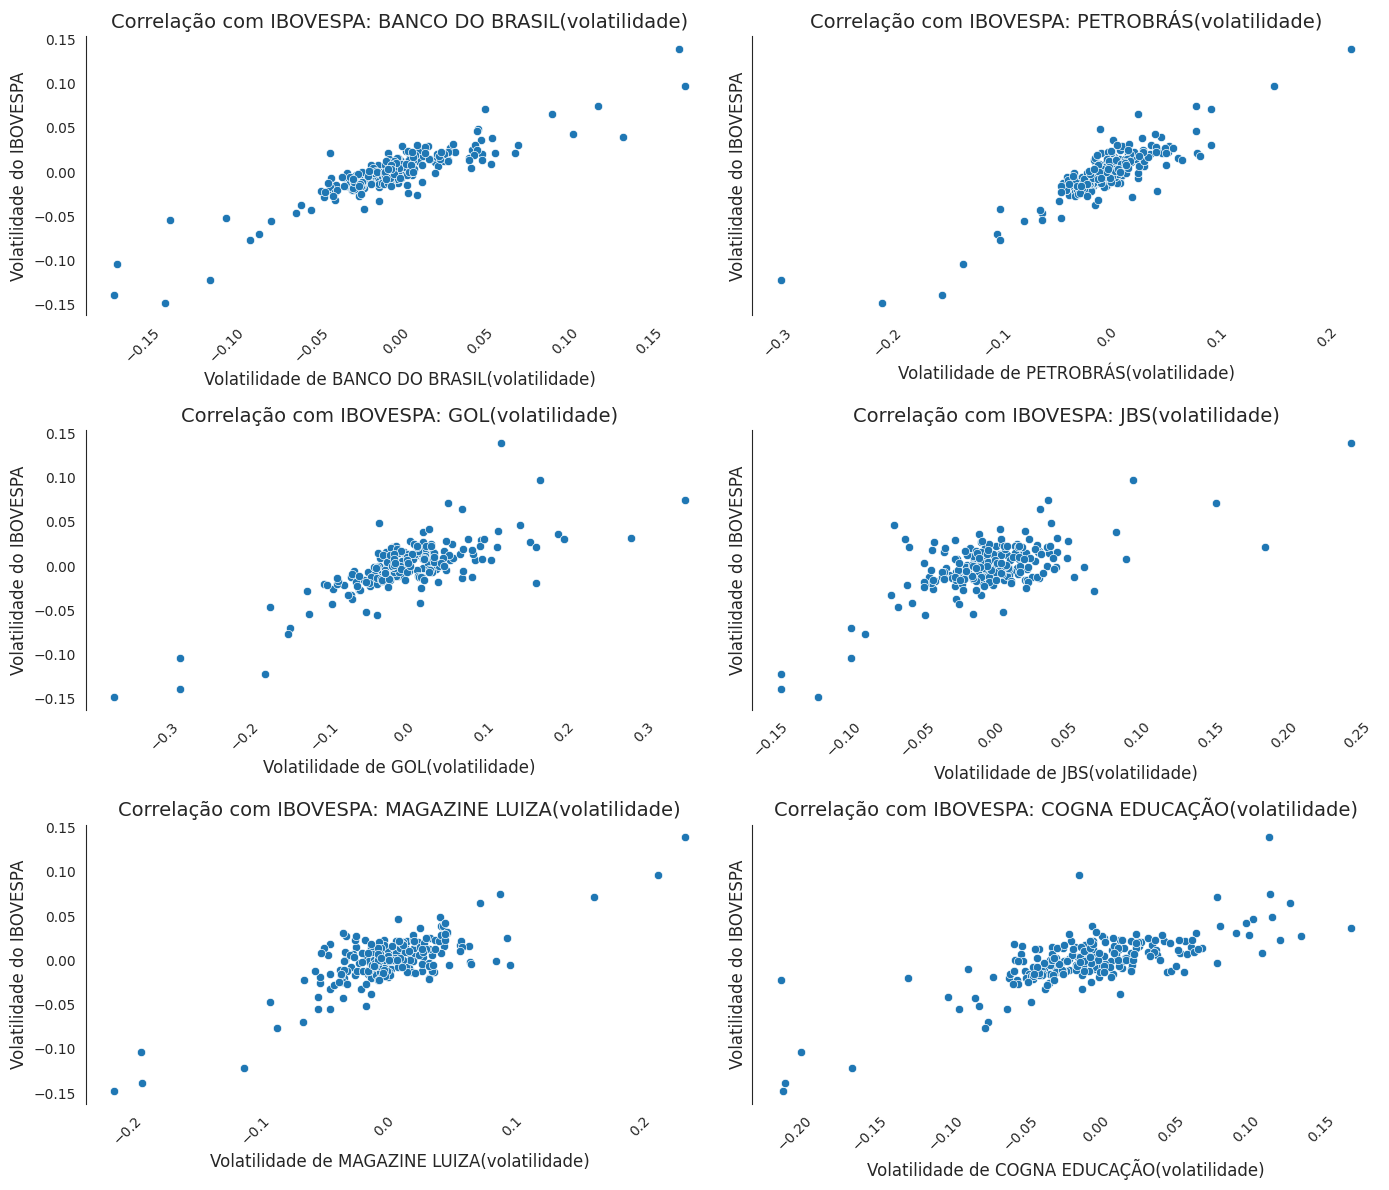

In [132]:
num_linhas = (len(volatilidade.columns) + 1) // 2
num_colunas = 2

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(14, 4*num_linhas))
for i, coluna in enumerate(volatilidade.columns):
    linha = i // num_colunas
    col = i % num_colunas

    sns.scatterplot(x=volatilidade[coluna], y=IBOVESPA_volat, ax=axs[linha, col])
    axs[linha, col].set_title(f'Correlação com IBOVESPA: {coluna}', fontsize=14)
    axs[linha, col].set_xlabel(f'Volatilidade de {coluna}', fontsize=12)
    axs[linha, col].set_ylabel('Volatilidade do IBOVESPA', fontsize=12)

    sns.despine(ax=axs[linha, col], bottom=True)
    axs[linha, col].tick_params(axis='x', labelrotation=45)

    if col == 0:
        axs[linha, col].tick_params(axis='y', labelleft=True)
    else:
        axs[linha, col].tick_params(axis='y', labelleft=False)

plt.tight_layout()
plt.show()

Nas oscilações de preços o IBOVESPA esteve mais correlacionado com o BANCO DO BRASIL nesse ano de 2020. Porém a diferença entre as correlações não foi muito grande

## Conclusão

---
Baseado na análise desse projeto, podemos concluir o que já era sabido: a crise do coronavírus abalou o mercado financeiro, causou incerteza por um determinado período de tempo, mas desde então se acalmou. Olhando as métricas, podemos ver que a bolsa de valores acompanhou o preço e a volatilidade de alguns ativos, ambos caindo no mesmo período, o período de maior incerteza e desinformação.
Estamos vivendo um momento ímpar, que veio devastando sistemas de saúde, vidas, famílias.

A educação parou, a vida de muita gente parou, empresas não resistiram, famílias se distanciaram. Uma análise sobre o mercado financeiro é muito pouco para buscar entender o que essa pandemia causou no Brasil e no mundo.

Abaixo, um gráfico de candlestick, que mostra a variação diária do preço no IBOVESPA

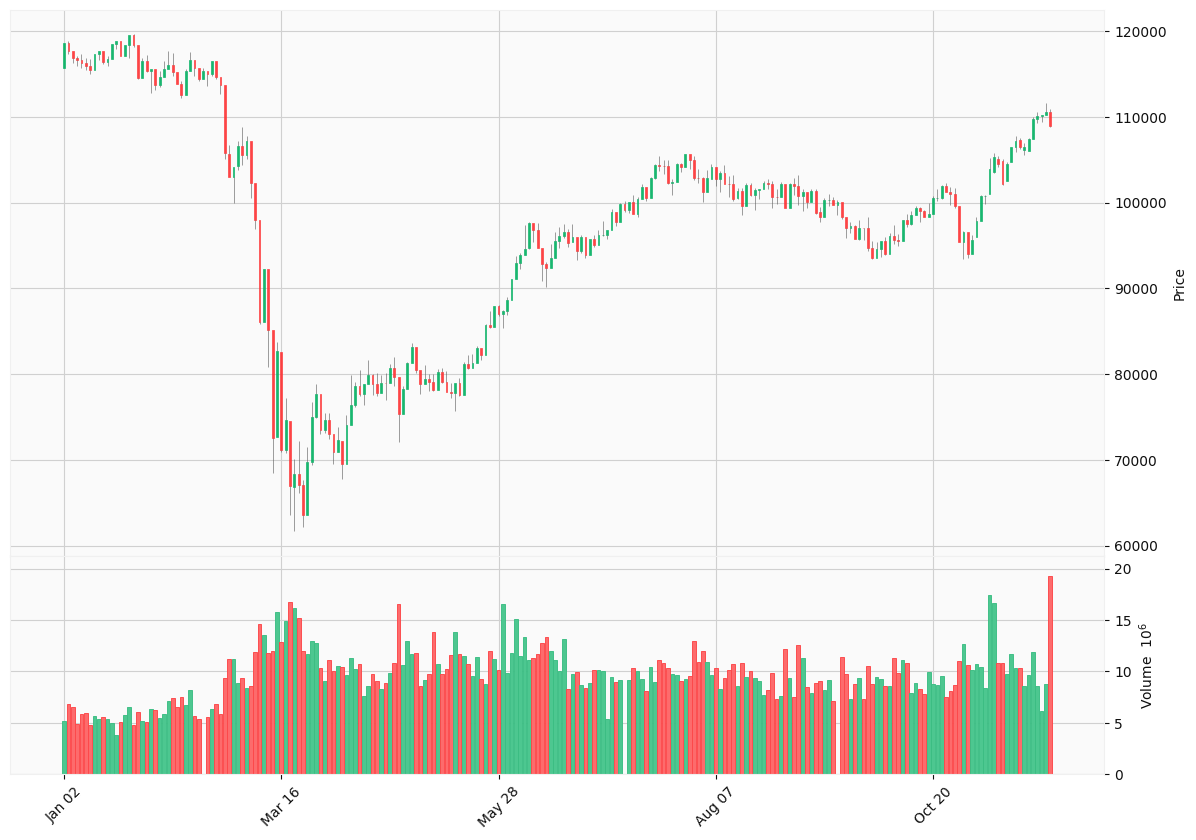

In [134]:
mpf.plot(IBOVESPA, type='candle', style='yahoo', volume=True, figscale=1.9)